# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between the tumor volume and weight of the mouse under the drug type Capomulin. 
- It is possible that the drug Capomulin is effective in reducing the tumor size, based on the correlation coefficient and that with mouse l509, the size of the tumor decreased over time. 
- Capomulin also had the smallest std deviation, meaning that the samples were the most condensed and close to the average values

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata, on= "Mouse ID", how="outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate=duplicate["Mouse ID"].unique()

In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID=combined_data.loc[(combined_data["Mouse ID"]=="g989")]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data_complete= combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
clean_data_complete = combined_data[combined_data['Mouse ID'].isin(duplicate)==False]
clean_data_complete.loc[(clean_data_complete["Mouse ID"]=="g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_complete["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
clean_data_complete.set_index(["Drug Regimen"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Capomulin,m601,25,33.118756,1,Male,22,17
Capomulin,m601,30,31.758275,1,Male,22,17
Capomulin,m601,35,30.834357,1,Male,22,17


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means=clean_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians=clean_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances=clean_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev=clean_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stderrormeans=clean_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({"Mean Tumor Volume": means,"Median Tumor Volume": medians, "Tumor Volume Variance": variances,
            "Tumor Volume Std.Dev": stdev, "Tumor Volume Std. Error": stderrormeans})
summary_df


/var/folders/yt/t3y4pntn55s72ch__9vhmrwr0000gn/T/ipykernel_14390/1918024032.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means=clean_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
/var/folders/yt/t3y4pntn55s72ch__9vhmrwr0000gn/T/ipykernel_14390/1918024032.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians=clean_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
/var/folders/yt/t3y4pntn55s72ch__9vhmrwr0000gn/T/ipykernel_14390/1918024032.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version,

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
## Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_data_complete.groupby("Drug Regimen").agg(
    means = ("Tumor Volume (mm3)","mean"),
    medians = ("Tumor Volume (mm3)","median"),
    var= ("Tumor Volume (mm3)","var"),
    stdev= ("Tumor Volume (mm3)","std"),
    sem= ("Tumor Volume (mm3)","sem")
)

,means,medians,var,stdev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

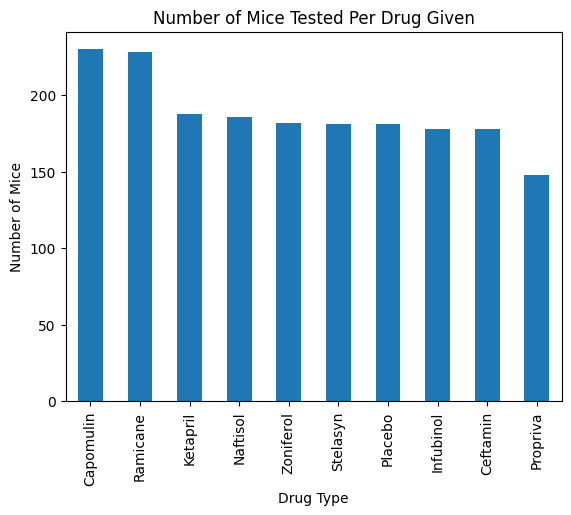

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_drug=clean_data_complete["Drug Regimen"].value_counts()
chart=mice_per_drug.plot(kind="bar", title="Number of Mice Tested Per Drug Given", xlabel="Drug Type", 
                         ylabel= "Number of Mice")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Propriva'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

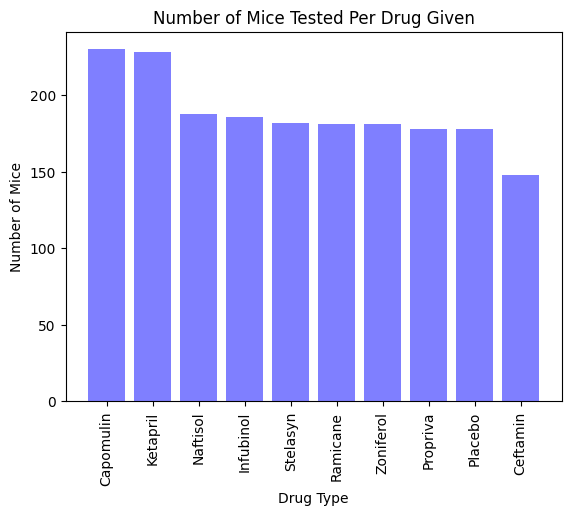

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_value= list(clean_data_complete["Drug Regimen"].unique())
y_value=[]
for i, x in enumerate (x_value):
    y_value.append(clean_data_complete["Drug Regimen"].value_counts()[i])
plt.bar(x_value, y_value, color='b', alpha=0.5, align="center")
plt.title("Number of Mice Tested Per Drug Given")
plt.xlabel("Drug Type")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

array([<Axes: ylabel='Sex'>], dtype=object)

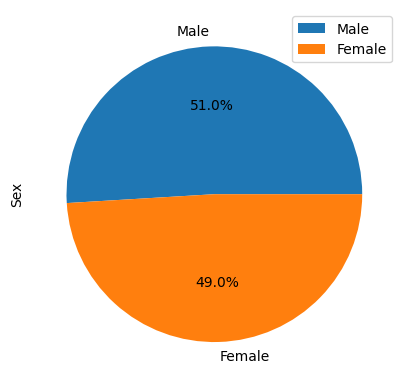

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=pd.DataFrame(clean_data_complete["Sex"].value_counts())
gender_df.plot.pie(subplots=True,autopct="%1.1f%%")

In [13]:
gender_df

,Sex
Male,958
Female,922


[958, 922]
[958, 922]


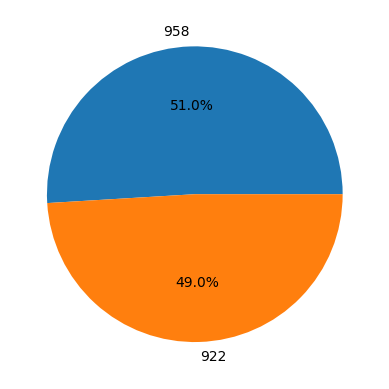

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_value=list(gender_df["Sex"].unique())
y_value=[]
for i, x in enumerate (x_value):
    y_value.append(clean_data_complete["Sex"].value_counts()[i])
plt.pie (y_value, labels=x_value, autopct="%1.1f%%")
print(y_value)
print(x_value)

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
print(max_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data=max_tumor.merge(clean_data_complete, on=["Mouse ID", "Timepoint"],how="left")


    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments1=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume_list = []
# outliers_lower=[]
# outliers_upper=[]
for drug in treatments1:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug} could be outliers: {outliers}")


Capomulin could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol could be outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


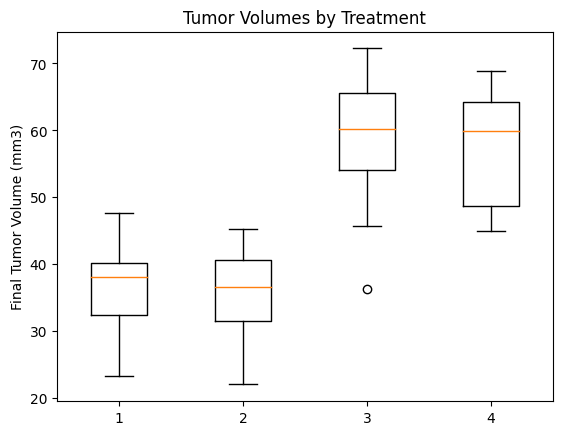

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_list)
plt.show()


## Line and Scatter Plots

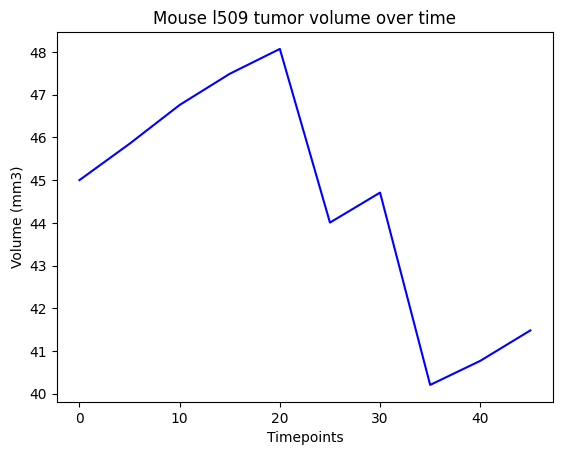

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509=clean_data_complete.loc[(clean_data_complete["Mouse ID"]=="l509")]
l509_volume=l509["Tumor Volume (mm3)"]
l509_time=l509["Timepoint"]

plt.plot(l509_time, l509_volume, color="blue", label="Mouse l509 tumor volume over time" )
plt.title("Mouse l509 tumor volume over time")
plt.xlabel("Timepoints")
plt.ylabel("Volume (mm3)")
plt.show()

/var/folders/yt/t3y4pntn55s72ch__9vhmrwr0000gn/T/ipykernel_14390/257874267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_averages=capomulin_weight.groupby(["Mouse ID"]).mean()


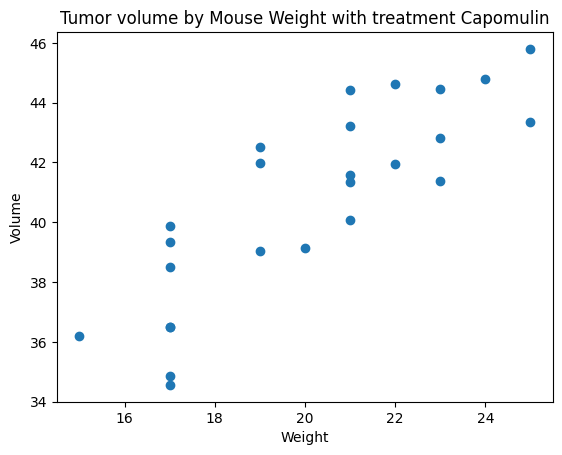

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight=clean_data_complete.loc[(clean_data_complete["Drug Regimen"]=="Capomulin")]
capomulin_averages=capomulin_weight.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_averages['Weight (g)'],capomulin_averages['Tumor Volume (mm3)'],)
plt.xlabel("Weight")
plt.ylabel("Volume")
plt.title("Tumor volume by Mouse Weight with treatment Capomulin")
plt.show()

## Correlation and Regression

The correlation for average tumor volume is 0.84


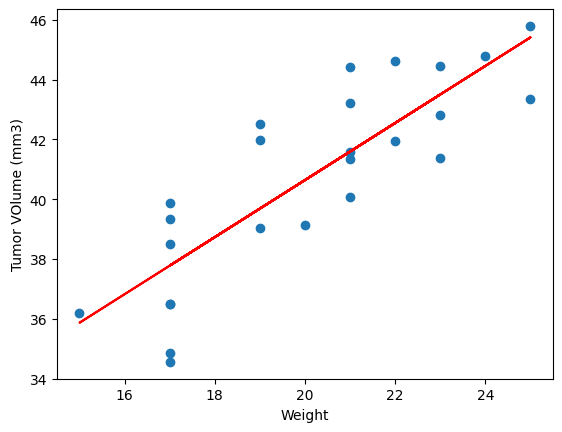

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_averages
avg_tumor_volume=capomulin_averages["Tumor Volume (mm3)"]
avg_weight=capomulin_averages["Weight (g)"]

correlation = st.pearsonr(avg_tumor_volume,avg_weight)
print(f"The correlation for average tumor volume is {round(correlation[0],2)}")

x_values = avg_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor VOlume (mm3)')
plt.show()